# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values # we are ignoring the first column, since it is redundant with the second, for our analysis
y = dataset.iloc[:, -1].values

## Training the Linear Regression model on the whole dataset

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
linear_regressor = LinearRegression()
linear_regressor.fit(x, y) #linear dataset y = b0 + b1.x1

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
polynomial_regressor = PolynomialFeatures(degree = 2) # degre is the power up to which we want to go with our polynomial matrix, each feature is one of the powers
x_poly = polynomial_regressor.fit_transform(x) #we are transforming our matix of a single feature into a new one with the passed number of features above (we are transforming b0 + b1.x1 into b0 + b1.x1 + b2.x1^2)
#x_poly is a matrix composed of the position levels and the square of the position levels (for degree=2)

In [7]:
linear_polynomial_regressor = LinearRegression()
linear_polynomial_regressor.fit(x_poly, y) #new regressor trained with the polinomial dataset

LinearRegression()

## Visualising the Linear Regression results

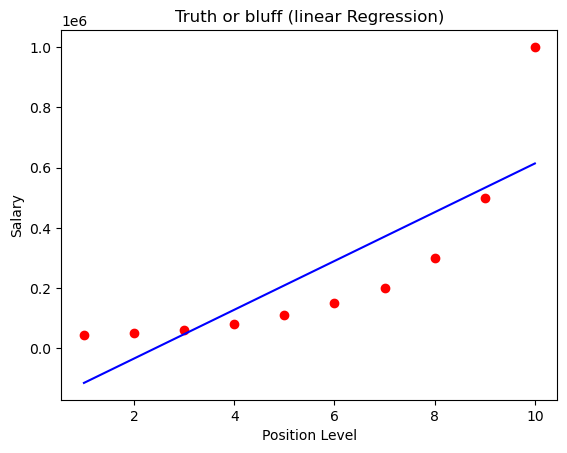

In [8]:
plt.scatter(x, y, color = 'red') # here we are ploting the real values
plt.plot(x, linear_regressor.predict(x), color = 'blue') # here we are ploting the predictions based on the linear model
plt.title('Truth or bluff (linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

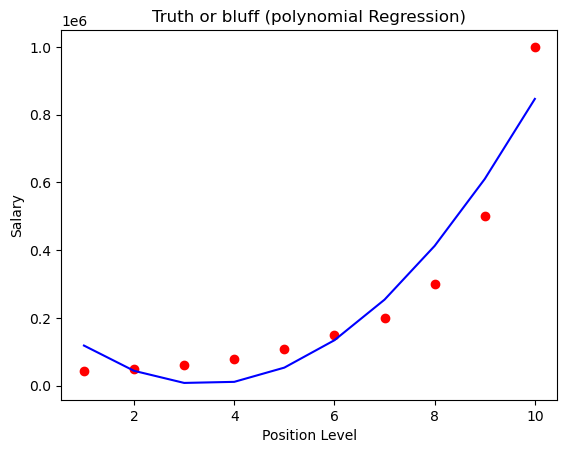

In [10]:
plt.scatter(x, y, color = 'red') # here we are ploting the real values
plt.plot(x, linear_polynomial_regressor.predict(x_poly), color = 'blue') # here we are ploting the predictions based on the polinomial model - we also need to pass the transformed matrix of features
plt.title('Truth or bluff (polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results with a higher degree

In [13]:
polynomial_regressor_2 = PolynomialFeatures(degree = 4) # here we are giving it a higher degree (b0 + b1.x1 into b0 + b1.x1 + b2.x1^2 + b3.x1^3 + b4.x1^4)
x_poly_2 = polynomial_regressor_2.fit_transform(x)
linear_polynomial_regressor_2 = LinearRegression()
linear_polynomial_regressor_2.fit(x_poly_2, y)

LinearRegression()

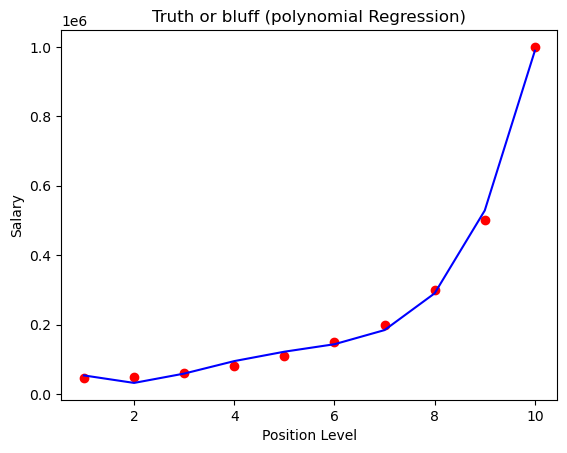

In [14]:
plt.scatter(x, y, color = 'red') # here we are ploting the real values
plt.plot(x, linear_polynomial_regressor_2.predict(x_poly_2), color = 'blue') # here we are ploting the predictions based on the polinomial model - we also need to pass the transformed matrix of features
plt.title('Truth or bluff (polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

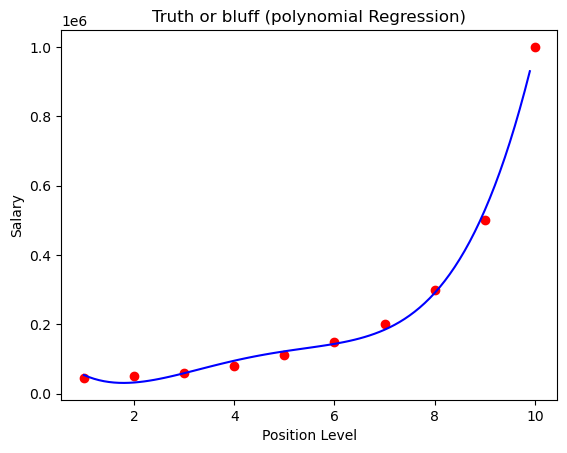

In [15]:
# here we are increasing the density of our x axys values (instead of dealing with the integers, we are spliting the data in 0,1 interval)
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid),1))

x_poly_3 = polynomial_regressor_2.fit_transform(x_grid)

plt.scatter(x, y, color = 'red')
plt.plot(x_grid, linear_polynomial_regressor_2.predict(x_poly_3), color = 'blue')
plt.title('Truth or bluff (polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [22]:
rank = 6.5
predicted_salary = linear_regressor.predict([[rank]])

print(f'For a {rank} rank, the salary should be %.2f' % predicted_salary)

For a 6.5 rank, the salary should be 330378.79


## Predicting a new result with Polynomial Regression

In [27]:
rank = 6.5
x_poly_4 = polynomial_regressor_2.fit_transform([[rank]])
predicted_salary = linear_polynomial_regressor_2.predict(x_poly_4)

print(f'For a {rank} rank, the salary should be %.2f' % predicted_salary)

For a 6.5 rank, the salary should be 158862.45
